Importing all the necessary things which are required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

The encoding='latin-1' on the CSV file and thus couldn't directly be read using pd.read_csv.

In [2]:
df = pd.read_csv("Email.csv", encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


Exploring and Cleaning the dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep = 'first')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dropping the unnamed columns

In [12]:
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Changing their names just for Clarity

In [14]:
df.rename(columns={"v1": "type", "v2": "email"}, inplace=True)
df.head()

,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Visualizing the dataset for better understanding

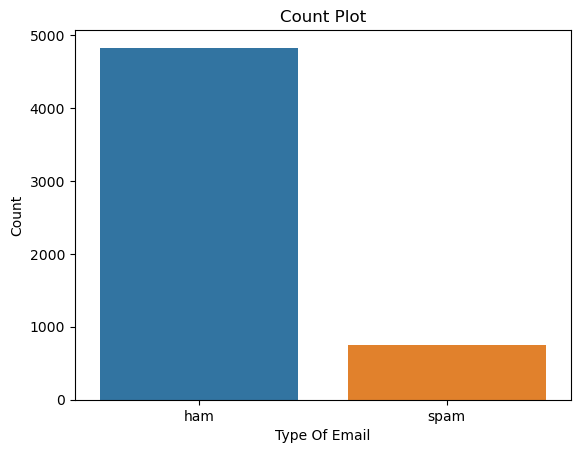

In [15]:
sns.countplot(data=df, x='type')
plt.xlabel('Type Of Email')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

As can be seen there is a imbalance between the value of Ham and Spam Emails

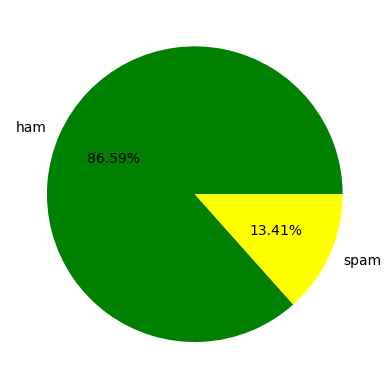

In [16]:
plt.pie(df['type'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', colors=['green', 'yellow'])
plt.show()

This watermelon esque, pie plot shows that there are 86.59% ham emails compared to a mere 13.41% of spam emails in the dataset

In [17]:
df.loc[df["type"] == "spam", "label"] = 0
df.loc[df["type"] == "ham", "label"] = 1
df.head()

,type,email,label
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


Label = 1 indicates the email is ham whereas Label = 0 indicates it is Spam

Training the dataset

In [18]:
X= df['email']
y=df['label']

Splitting the data up for training

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

Since the values in Label are currently in Float (1.0,0.0) we need to change them to integers.

In [21]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [22]:
y_train=y_train.astype("int")
y_test=y_test.astype("int")

# Logistic Regression

In [23]:
model=LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [24]:
predict_train_data=model.predict(X_train_features)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_lr=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_lr)

Accuracy on training data:  0.971729863136639


In [26]:
predict_test_lr=model.predict(X_test_features)

In [27]:
accuracy_test_lr=accuracy_score(y_test,predict_test_lr)
print("Accuracy on test data: ",accuracy_test_lr)

Accuracy on test data:  0.9560538116591928


In [28]:
print("R-Squared value : ", r2_score(y_test,predict_test_lr))

R-Squared value :  0.6386717458301919


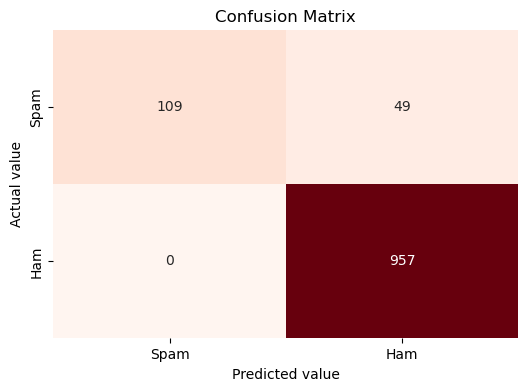

In [29]:
conf_matrix=confusion_matrix(y_test,predict_test_lr)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Reds",cbar=False, xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [30]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


In [31]:
new_mail = ["Congratulations! You've won a free iPhone 17! Click here to claim your prize."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail


# Decision Tree Classifier

In [32]:
model1 = DecisionTreeClassifier(random_state=0)
model1.fit(X_train_features,y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
predict_train_dc=model1.predict(X_train_features)

In [34]:
accuracy_train_dc=accuracy_score(y_train,predict_train_dc)
print("Accuracy on training data: ",accuracy_train_dc)

Accuracy on training data:  1.0


In [35]:
predict_test_dc=model1.predict(X_test_features)

In [36]:
accuracy_test_dc=accuracy_score(y_test,predict_test_dc)
print("Accuracy on test data: ",accuracy_test_dc)

Accuracy on test data:  0.9632286995515695


In [37]:
print("R-Squared value : ", r2_score(y_test,predict_test_dc))

R-Squared value :  0.6976641138579157


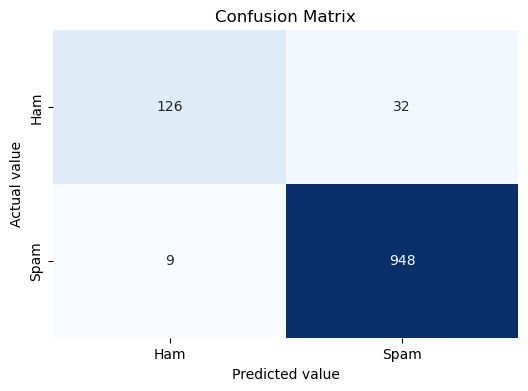

In [38]:
conf_matrix = confusion_matrix(y_test, predict_test_dc)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")

plt.show()

In [39]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model1.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


In [40]:
new_mail = ["Congratulations! You've won a free iPhone 17! Click here to claim your prize."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model1.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail
